# Лабораторная работа номер 2.  

Подмогильный Иван Александрович  
23.09.2021


### Упражнение 1

In [18]:
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

In [2]:
points = np.array([[0,1], [1,2], [3,5], [3, 6]])
transform = 5

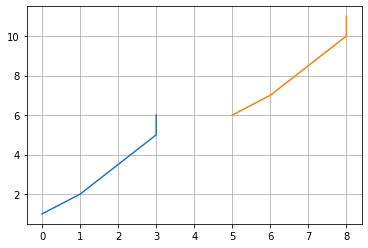

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(points[:, 0], points[:, 1])
ax1.grid()

tr_points = points + transform
ax1.plot(tr_points[:, 0], tr_points[:, 1])

### Упражнение 2
#### Задание:  

Нарисовать произвольный многоугольник. Выполнить над ним следующие преобразования:
 - повороты вокруг указанной произвольной точки на заданный угол;
 - поворот вокруг центра масс;
 - сдвиги по указанному направлению (вектору);
 - отражение относительно биссектрисы первой четверти декартовой системы координат.  


На рисунке должен отображаться центр масс многоугольника, его вершины и углы поворота.

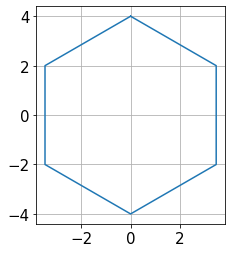

In [4]:
points = np.array([[ 2.44929360e-16,  4.00000000e+00],
                 [-3.46410162e+00,  2.00000000e+00],
                 [-3.46410162e+00, -2.00000000e+00],
                 [-7.34788079e-16, -4.00000000e+00],
                 [ 3.46410162e+00, -2.00000000e+00],
                 [ 3.46410162e+00,  2.00000000e+00],
                 [ 1.22464680e-15,  4.00000000e+00]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
ax.grid()
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.plot(points[:, 0], points[:, 1])

In [86]:

def xy_rotation(points, xy, rad=None, deg=None):
    """
    Function to rotate the polygon w.r.t. any point xy.
    :param points: np.array of points representing array; shape is [-1, 2]
    :param xy: np.array input point
    :param rad: angle in radians.
    :param deg: angle in degrees.
    :return: np.array of transformed points.
    """
    if rad:
        angle = rad
    elif deg:
        angle = deg * np.pi / 180
    else:
        print("Please, feed the angle in rad or deg!")
        return 1

    rot = np.array([[np.cos(angle), -np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]])
    # User can forget that we need point as np.array
    xy = np.array(xy)
    # Rotate the polygon
    print("Points are", points)
    print("Translated points are", points - xy)
    rotated_points = (points - xy) @ rot
    # Go back to the origin
    rotated_points += xy

    return rotated_points

def center_rotation(points, rad=None, deg=None):
    """
    Function to rotate an arbitrary polygon around it's center of the weights.
    :param points: np.array of points representing array; shape is [-1, 2]
    :param rad: angle in radians. If rad and ged are both passed, it will choose the rad.
    :param deg: angle in degrees
    :return: np.array of rotated points
    """
    if rad:
        angle = rad
    elif deg:
        angle = deg * np.pi / 180
    else:
        print("Please, feed the angle in rad or deg!")
        return 1

    # Take the average over all x, and the average over all y.
    x = np.mean(points[:, 0])
    y = np.mean(points[:, 1])
    xy = np.c_[x, y]
    rotated_points = xy_rotation(points, xy, angle)

    return rotated_points

def vector_transl(points, vec, xy_transl):
    """
    Function to translate the polygon among the chosen vector.
    :param points: np.array of shape [-1, 2], of polygon points
    :param vec: np.array [x,y], representing the desired vector
    :param xy_transl: np.array [x,y], representing the x and y translation.
    :return: np.array of shape [-1, 2]
    """
    transl = vec * xy_transl
    points = points + transl
    return points

def bisector_mirror(points):
    """
    Mirrors the polygon w.r.t bisector of the 1 quarter of the Cartesian coordinate system.
    :param points: np.array of shape [-1, 2], of polygon points
    :return: np.array of shape [-1, 2]
    """
    mir = np.array( [[0, 1],
                     [1, 0]] )
    return points @ mir

In [123]:
# TODO: Add to every test: center of the polygon, it's vertices, and the angles
#  of rotation where applicable
def test1():
    # TEST FOR POINT 1. xy_rotation()
    points = np.array([[ 2.44929360e-16,  4.00000000e+00],
                 [-3.46410162e+00,  2.00000000e+00],
                 [-3.46410162e+00, -2.00000000e+00],
                 [-7.34788079e-16, -4.00000000e+00],
                 [ 3.46410162e+00, -2.00000000e+00],
                 [ 3.46410162e+00,  2.00000000e+00],
                 [ 1.22464680e-15,  4.00000000e+00]])

    xy = np.array([5, 5])

    fig = plt.figure(figsize=(10,10), num=1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.grid()
    ax1.set_aspect('equal')
    ax1.set_xlim(-15, 15)
    ax1.set_ylim(-15, 15)
    ax1.plot(points[:, 0], points[:, 1], label="Origin points")
    # ax1.plot(points[:, 0] - xy[0], points[:, 1] - xy[1], label="Translated points")
    ax1.plot(xy[0], xy[1], 'go', label="xy point")
    ax1.legend()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.grid()
    ax2.set_aspect('equal')
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    rot_points = xy_rotation(points, xy, deg=45)
    ax2.plot(rot_points[:, 0], rot_points[:, 1], label='Rotated points')
    ax2.plot(xy[0], xy[1], 'go', label='xy point')
    ax2.legend()

    fig.savefig("result.pdf", dpi=250, format="pdf")

def test2():
    points = np.array([[ 2.44929360e-16,  4.00000000e+00],
                 [-3.46410162e+00,  2.00000000e+00],
                 [-3.46410162e+00, -2.00000000e+00],
                 [-7.34788079e-16, -4.00000000e+00],
                 [ 3.46410162e+00, -2.00000000e+00],
                 [ 3.46410162e+00,  2.00000000e+00],
                 [ 1.22464680e-15,  4.00000000e+00]])
    points += 3

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.grid()
    ax1.set_aspect('equal')
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.plot(points[:, 0], points[:, 1], label="Origin points")
    ax1.legend()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.grid()
    ax2.set_aspect('equal')
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    rot_points = center_rotation(points, deg=90)
    ax2.plot(rot_points[:, 0], rot_points[:, 1], label='Rotated points')
    ax2.legend()

    fig.savefig("result2.pdf", dpi=250, format="pdf")

def test3():
    # TEST FOR POINT 3
    points = np.array([[ 0,  4.00000000e+00],
                 [-3.46410162e+00,  2.00000000e+00],
                 [-3.46410162e+00, -2.00000000e+00],
                 [-7.34788079e-16, -4.00000000e+00],
                 [ 3.46410162e+00, -2.00000000e+00],
                 [ 3.46410162e+00,  2.00000000e+00],
                 [ 1.22464680e-15,  4.00000000e+00]])
    # Last point is repeating the start point, so we do not take it in consideration.
    origin_center = np.array( [np.mean(points[:-1, 0]), np.mean(points[:-1, 1])] )
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.grid()
    ax1.set_aspect('equal')
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)

    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.yaxis.set_minor_locator(MultipleLocator(1))
    ax1.yaxis.set_major_locator(MultipleLocator(1))

    ax1.plot(points[:, 0], points[:, 1], label="Origin points")
    ax1.plot(origin_center[0], origin_center[1], 'go')
    ax1.legend()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.grid()
    ax2.set_aspect('equal')
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)

    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.xaxis.set_major_locator(MultipleLocator(1))
    ax2.yaxis.set_minor_locator(MultipleLocator(1))
    ax2.yaxis.set_major_locator(MultipleLocator(1))

    transl_points = vector_transl( points, np.array([1, 0.5]), np.array([2, 3]) )

    ax2.plot(transl_points[:, 0], transl_points[:, 1], label='Translated points')
    # Last point is repeating the start point, so we do not take it in consideration.
    transl_center = np.array( [np.mean(transl_points[:-1, 0]), np.mean(transl_points[:-1, 1])] )
    ax2.plot( [origin_center[0], transl_center[0]], [origin_center[1], transl_center[1]] )
    ax2.plot( [origin_center[0], transl_center[0]], [origin_center[1], transl_center[1]], 'go' )
    ax2.legend()

    fig.savefig("result3.pdf", dpi=250, format="pdf")

def test4():
    # TEST FOR POINT 3
    points = np.array([[ 0,  4.00000000e+00],
                 [-3.46410162e+00,  2.00000000e+00],
                 [-3.46410162e+00, -2.00000000e+00],
                 [-7.34788079e-16, -4.00000000e+00],
                 [ 3.46410162e+00, -2.00000000e+00],
                 [ 3.46410162e+00,  2.00000000e+00],
                 [ 1.22464680e-15,  4.00000000e+00]])
    points[:, 0] += 8

    bpoints = bisector_mirror(points)

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.grid()
    ax1.set_aspect('equal')

    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.xaxis.set_major_locator(MultipleLocator(1))
    ax1.yaxis.set_minor_locator(MultipleLocator(1))
    ax1.yaxis.set_major_locator(MultipleLocator(1))

    ax1.plot(points[:, 0], points[:, 1], label="Origin points")
    ax1.plot(bpoints[:, 0], bpoints[:, 1], label='Bisector points')

    conduct = np.zeros( (points.shape[0] * 2, 2) )
    conduct[::2, :] = points
    conduct[1::2, :] = bpoints

    for i in range(0, conduct.shape[0] - 1, 2):
        ax1.plot([conduct[i, 0], conduct[i+1, 0]], [conduct[i, 1], conduct[i+1, 1]], label='Mirror', lw=.5, marker='o')
    ax1.axline([0, 0], [1, 1])
    ax1.legend()

    fig.savefig("result4.pdf", dpi=250, format="pdf")

Points are [[ 2.44929360e-16  4.00000000e+00]
 [-3.46410162e+00  2.00000000e+00]
 [-3.46410162e+00 -2.00000000e+00]
 [-7.34788079e-16 -4.00000000e+00]
 [ 3.46410162e+00 -2.00000000e+00]
 [ 3.46410162e+00  2.00000000e+00]
 [ 1.22464680e-15  4.00000000e+00]]
Translated points are [[-5.         -1.        ]
 [-8.46410162 -3.        ]
 [-8.46410162 -7.        ]
 [-5.         -9.        ]
 [-1.53589838 -7.        ]
 [-1.53589838 -3.        ]
 [-5.         -1.        ]]


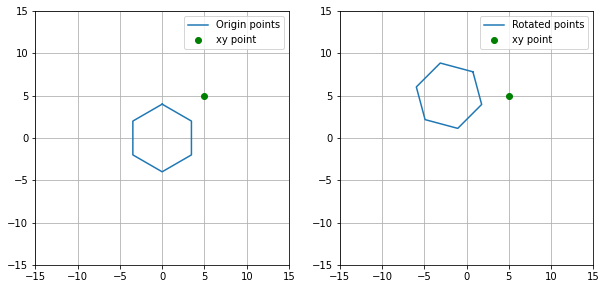

In [67]:
test1()

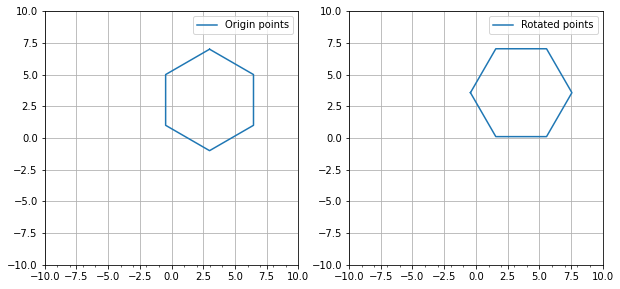

In [57]:
test2()


[[ 0.00000000e+00  4.00000000e+00]
 [-3.46410162e+00  2.00000000e+00]
 [-3.46410162e+00 -2.00000000e+00]
 [-7.34788079e-16 -4.00000000e+00]
 [ 3.46410162e+00 -2.00000000e+00]
 [ 3.46410162e+00  2.00000000e+00]
 [ 1.22464680e-15  4.00000000e+00]]


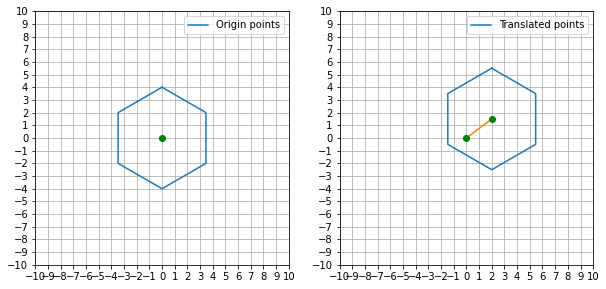

In [83]:
# The polygon has to be translated by [2, 1.5], it also has to be the center of the new polygon.
test3()

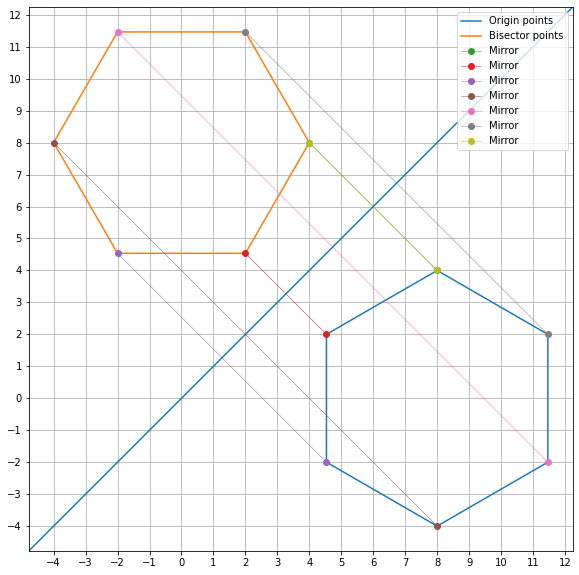

In [124]:
test4()


### Упражнение 3
#### Задание:

Повторите как можно более точно пример из презентации, изображенный на рисунке 6. Угол
поворота можете взять произвольный. Дуги окружности, по которым происходит поворот можно
изобразить без стрелок.


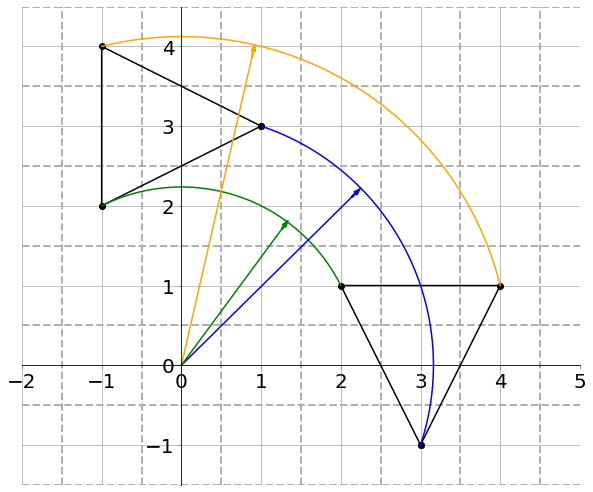

In [177]:
points = np.array([ [3, -1], [4, 1], [2, 1], [3, -1] ])
angle = np.pi / 2
rot = np.array([ [np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)] ])
rot_points = points @ rot
# Radius
r1 = np.hypot(points[0][0], points[0][1])
r2 = np.hypot(points[1][0], points[1][1])
r3 = np.hypot(points[2][0], points[2][1])

# Angles. Taking the cos.
a1_start = np.arccos( points[0][0] / r1 )
a2_start = np.arccos( points[1][0] / r2 )
a3_start = np.arccos( points[2][0] / r3 )

a1_finish = np.arccos( rot_points[0][0] / r1 )
a2_finish = np.arccos( rot_points[1][0] / r2 )
a3_finish = np.arccos( rot_points[2][0] / r3 )

# The degree that we found for a1_start is positive, but on our graph it's negative.
range1 = np.linspace(-a1_start, a1_finish, 1000)
range2 = np.linspace(a2_start, a2_finish, 1000)
range3 = np.linspace(a3_start, a3_finish, 1000)

x1 = r1 * np.cos(range1)
y1 = r1 * np.sin(range1)
x2 = r2 * np.cos(range2)
y2 = r2 * np.sin(range2)
x3 = r3 * np.cos(range3)
y3 = r3 * np.sin(range3)

fig = plt.figure( figsize=(10, 10) )
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.5))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(which="both", color="grey", labelsize="20")

ax.set_ylim(-1.5, 4.5)
ax.set_xlim(-2, 5)

ax.set_aspect('equal')
ax.grid()
ax.grid(which="minor", linestyle = "--", lw=2)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

ax.plot(points[:, 0], points[:, 1], marker="o", color="black")
ax.plot(rot_points[:, 0], rot_points[:, 1], marker="o", color="black")
ax.plot(x1, y1, color="blue")
ax.plot(x2, y2, color="orange")
ax.plot(x3, y3, color="green")

ax.plot([0, x1[700]], [0, y1[700]], color="blue")
ax.arrow(x1[700] - x1[700]*0.05, y1[700] - y1[700]*0.05, x1[700]*0.02, y1[700]*0.02, width=0.02, color="blue")

ax.plot([0, x2[700]], [0, y2[700]], color="orange")
ax.arrow(x2[700] - x2[700]*0.04, y2[700] - y2[700]*0.04, x2[700]*0.02, y2[700]*0.02, width=0.02, color="orange")

ax.plot([0, x3[300]], [0, y3[300]], color="green")
ax.arrow(x3[300] - x3[300]*0.05, y3[300] - y3[300]*0.05, x3[300]*0.02, y3[300]*0.02, width=0.02, color="green")